# Netflix data 분석

## Kaggle (캐글)
: 데이터 분석 경진대회를 주최하는 플랫폼

netflix data download : https://www.kaggle.com/datasets/shivamb/netflix-shows

* 데이터 파악
* 데이터 전처리 (결측치, feature Engineering : 파생 변수 생성)
* 데이터 분석 -> 인사이트 도출

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

netflix = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/data/netflix_titles.csv')

# 컬럼명 확인

netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [18]:
# 처음 10개 행만 출력
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [19]:
# .info() : 전반적인 정보를 제공

netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [20]:
# 결측치 비율 계산

for i in netflix.columns :
  # print ("컬럼명 : %s" % i)
  missing_rate = netflix[i].isna().sum() / len(netflix) * 100
  if missing_rate > 0 :
    print ("{} - missing_rate : {}%".format(i, round(missing_rate, 2)))
    print ("-----------------------------------------------------------")


director - missing_rate : 29.91%
-----------------------------------------------------------
cast - missing_rate : 9.37%
-----------------------------------------------------------
country - missing_rate : 9.44%
-----------------------------------------------------------
date_added - missing_rate : 0.11%
-----------------------------------------------------------
rating - missing_rate : 0.05%
-----------------------------------------------------------
duration - missing_rate : 0.03%
-----------------------------------------------------------


In [ ]:
# 결측치 처리
# .fillna() : 결측 값을 특정 값으로 대체
# .replace(np.nan, '문자') : NaN을 '문자'로 대체
# .dropna(axis=0) : 결측치가 있는 행 전체를 제거 (axis=1) => 열
# 원본 객체를 변경하려면 inplace = True 옵션을 추가

In [21]:
# .fillna()
netflix['country'].fillna('No Data', inplace = True)

In [22]:
# .replace(np.nan, '문자')
netflix['cast'].replace(np.nan, 'No Data', inplace = True)
netflix['director'].replace(np.nan, 'No Data', inplace = True)

In [25]:
# .dropna(axis=0)
netflix.dropna(axis=0, inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 1.1+ MB


In [ ]:
# .info() : 처리한 결측치 확인
netflix.info()

In [27]:
# 처리한 결측치 확인
# .isna().sum()
# .isnull().sum()
netflix.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [29]:
# featrue Engineering
# to_datetime() : object 타입의 date_added 컬럼을 datetime 타입으로 변ㄴ환

netflix['date_added'] = pd.to_datetime(netflix['date_added'])
# netflix.info()
netflix['year_added'] = netflix['date_added'].dt.year
netflix['month_added'] = netflix['date_added'].dt.month
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,No Data,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


In [32]:
# 시청 등급 변환
netflix['rating'].unique()


array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [36]:
netflix['age_group'] = netflix['rating']
age_group = {'TV-MA': 'Adults',
            'R': 'Adults',
            'PG-13': 'Teens',
            'TV-14': 'Young Adults',
            'TV-PG': 'Older Kids',
            'NR': 'Adults',
            'TV-G': 'Kids',
            'TV-Y': 'Kids',
            'TV-Y7': 'Older Kids',
            'PG': 'Older Kids',
            'G': 'Kids',
            'NC-17': 'Adults',
            'TV-Y7-FV': 'Older Kids',
            'UR': 'Adults'}

# map() : dict에 정의한 내용으로 매칭하여 변환
netflix['age_group'] = netflix['age_group'].map(age_group)
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,Teens
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,Adults
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,No Data,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,Adults
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11,Adults
8803,s8804,TV Show,Zombie Dumb,No Data,No Data,No Data,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,7,Older Kids
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11,Adults
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,Older Kids


In [38]:
# 검색 : str.contains('문자열', na = False, case = False) : na -> 결측치 | case -> 대소문자 구분 => 문자열을 포함하면 True/ 아니면 False
netflix['title'].str.contains('squid', na = False, case = False)
netflix[netflix['title'].str.contains('squid', na = False, case = False)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_group
33,s34,TV Show,Squid Game,No Data,"Lee Jung-jae, Park Hae-soo, Wi Ha-jun, Oh Youn...",No Data,2021-09-17,2021,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Thrillers",Hundreds of cash-strapped players accept a str...,2021,9,Adults
3476,s3477,Movie,The Squid and the Whale,Noah Baumbach,"Jeff Daniels, Laura Linney, Jesse Eisenberg, O...",United States,2019-10-01,2005,R,81 min,"Comedies, Dramas, Independent Movies",This insightful drama looks at the crumbling m...,2019,10,Adults


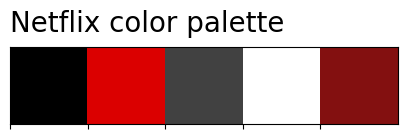

In [42]:
# 데이터 시각화
# color pallete
sns.palplot(['#000000', '#db0000', '#414141', '#ffffff', '#831010'])
plt.title('Netflix color palette', loc='left', fontsize=20, y= 1.1)
plt.show()

In [43]:
netflix['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [45]:
# ratio = pd.DataFrame(netflix['type'].value_counts())
ratio = pd.DataFrame(netflix['type'].value_counts()).T # .T transpose(전치) : 행과 열 바꾸기
ratio

,Movie,TV Show
type,6126,2664


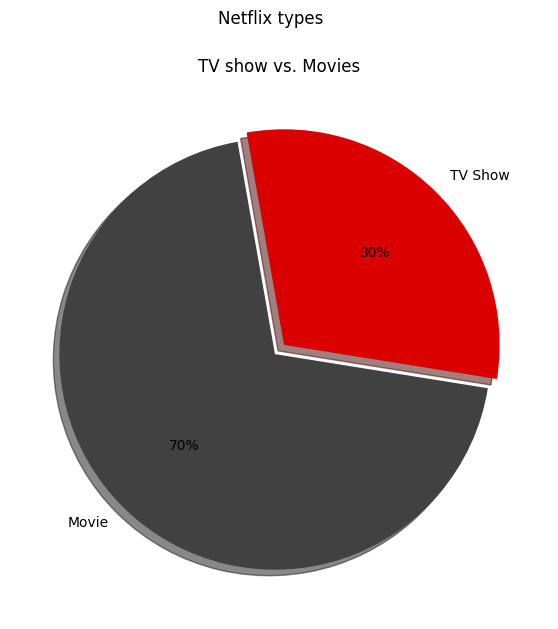

In [64]:
plt.figure(figsize = (7, 7))
plt.pie(ratio.loc['type'], labels=ratio.columns, autopct='%0.f%%', startangle = 100, explode=[0.03, 0.03], shadow = True, colors=['#414141', '#db0000'])
plt.suptitle('Netflix types')
plt.title('TV show vs. Movies')
plt.show()

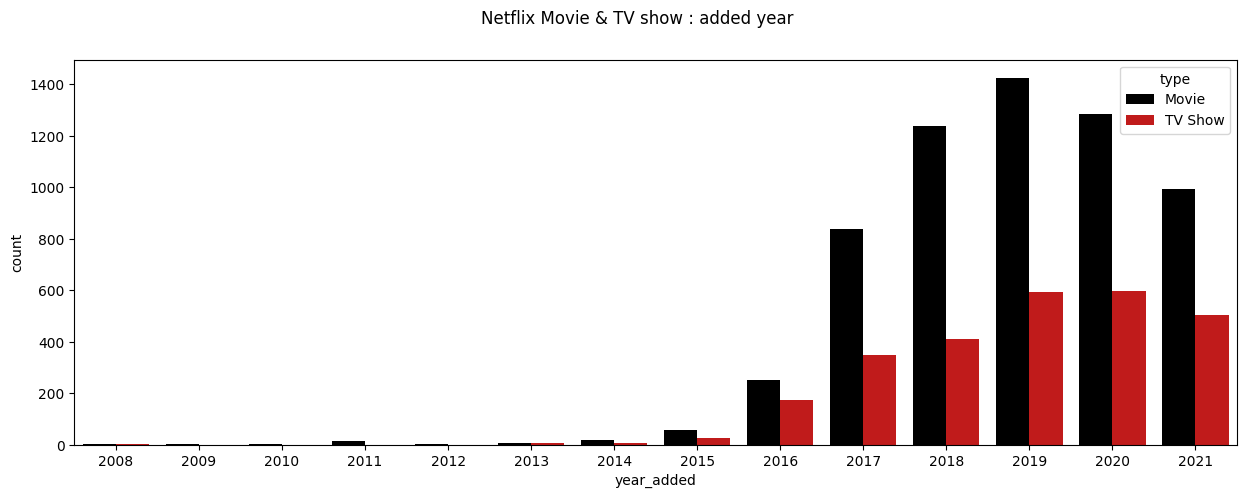

In [71]:
# 연도별 type data 시각화
# countplot() : 막대 그래프
plt.figure(figsize=(15, 5))
sns. countplot(data=netflix, x='year_added', hue = 'type', palette =['#000000', '#db0000'])

plt.suptitle('Netflix Movie & TV show : added year')
plt.show()

In [81]:
# 월별 type data 수치
# unstack() : 인덱스를 컬럼으로 바꾸는 역할
# stack() : 컬럼을 인덱스로 바꾸는 역할
netflix_month = netflix.groupby('month_added')['type'].value_counts().unstack()
netflix_month

type,Movie,TV Show
month_added,,
1,545,192
2,382,180
3,528,213
4,549,214
5,439,193
6,492,236
7,565,262
8,518,236
9,518,251


In [ ]:
print(netflix_month.max())
netflix_month.idxmax()

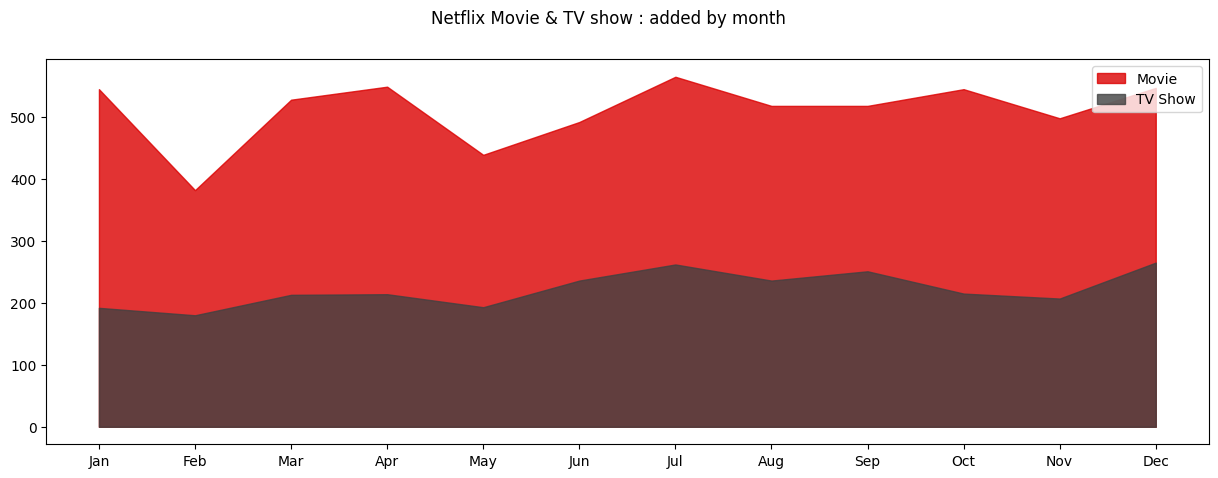

In [96]:
# fill_between() : x축을 기준으로 그래프 영역을 채우는 함수 |  fill_betweenx()

plt.figure(figsize=(15, 5))
plt.fill_between(x=netflix_month['Movie'].index, y1=0, y2=netflix_month['Movie'], color='#db0000', alpha=0.8, label='Movie')
plt.fill_between(x=netflix_month['TV Show'].index, y1=0, y2=netflix_month['TV Show'], color='#414141', alpha=0.8, label='TV Show')

plt.legend()
plt.suptitle('Netflix Movie & TV show : added by month')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [101]:
# 나라별 타게팅하는 연령

netflix_age_country = netflix.groupby('age_group')['country'].value_counts().unstack()
netflix_age_country

country,", France, Algeria",", South Korea",Argentina,"Argentina, Brazil, France, Poland, Germany, Denmark","Argentina, Chile","Argentina, Chile, Peru","Argentina, France","Argentina, France, United States, Germany, Qatar","Argentina, Italy","Argentina, Spain",...,"Uruguay, Argentina, Germany, Spain","Uruguay, Argentina, Spain","Uruguay, Germany","Uruguay, Guatemala","Uruguay, Spain, Mexico",Venezuela,"Venezuela, Colombia",Vietnam,West Germany,Zimbabwe
age_group,,,,,,,,,,,,,,,,,,,,,
Adults,NaN,1.0,42.0,NaN,1.0,1.0,1.0,1.0,1.0,7.0,...,1.0,1.0,NaN,NaN,1.0,NaN,1.0,3.0,1.0,NaN
Kids,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0
Older Kids,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Teens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Young Adults,1.0,NaN,7.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3.0,NaN,NaN


In [105]:
age_order = ['Kids', 'Older Kids', 'Teens', 'Adults']
country_order = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Germany', 'Spain', 'Mexico']

netflix_age_country = netflix_age_country.loc[age_order, country_order]
netflix_age_country.fillna(0, inplace=True)
netflix_age_country

country,United States,India,United Kingdom,Canada,Japan,France,South Korea,Germany,Spain,Mexico
age_group,,,,,,,,,,
Kids,198.0,14.0,42.0,32.0,3.0,12.0,5.0,4.0,3.0,2.0
Older Kids,515.0,151.0,82.0,40.0,60.0,7.0,23.0,4.0,6.0,9.0
Teens,289.0,4.0,8.0,3.0,3.0,1.0,0.0,0.0,1.0,1.0
Adults,1403.0,253.0,214.0,80.0,87.0,83.0,88.0,47.0,122.0,85.0


In [107]:
netflix_age_country.isna().sum()

country
United States     0
India             0
United Kingdom    0
Canada            0
Japan             0
France            0
South Korea       0
Germany           0
Spain             0
Mexico            0
dtype: int64

In [108]:
netflix_age_country.sum(axis=1)

age_group
Kids           315.0
Older Kids     897.0
Teens          310.0
Adults        2462.0
dtype: float64

In [109]:
netflix_age_country.sum(axis=0) # 컬럼별 sum() 결과 값을 반환

country
United States     2405.0
India              422.0
United Kingdom     346.0
Canada             155.0
Japan              153.0
France             103.0
South Korea        116.0
Germany             55.0
Spain              132.0
Mexico              97.0
dtype: float64

In [116]:
netflix_age_country = netflix_age_country.div(netflix_age_country.sum(axis=0), axis=1) # 행 기준으로 각 컬럼별 합으로 나누기

<Axes: xlabel='country', ylabel='age_group'>

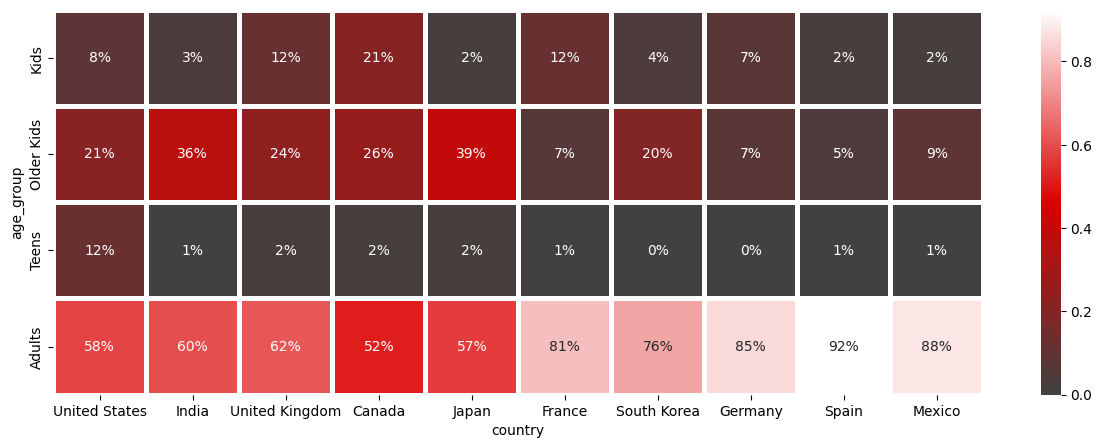

In [121]:
# heatmap() :
plt.figure(figsize=(15, 5))

# 컬러맵 생성 :  plt.matplotlib.colors.LinearSegmentedColormap.from_list()
# fmt :
# .0% : N
# .1% : N.n
# .2% : N.nn

cmap = plt.matplotlib.colors.LinearSegmentedColormap.from_list("", ['#414141', '#db0000', '#ffffff'])
sns.heatmap(netflix_age_country, cmap = cmap, annot = True, fmt='.0%', linewidths=2.5)


In [ ]:
# 워드 클라우드
list(netflix['description'])


In [127]:
!pip install Pillow

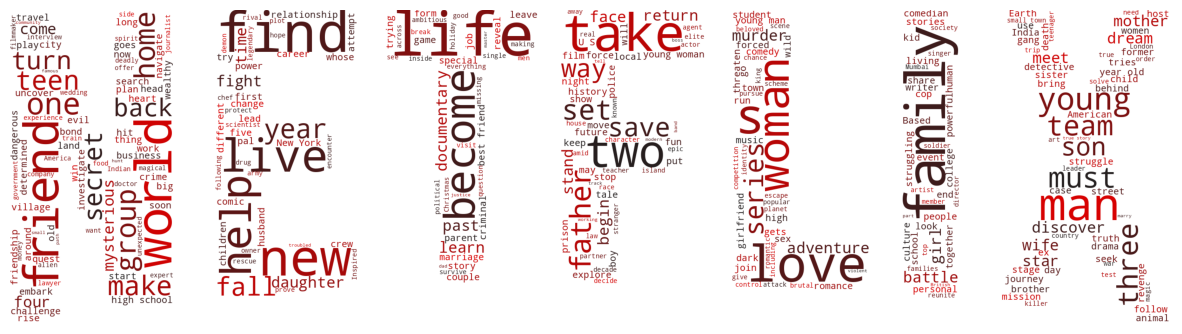

In [134]:
from wordcloud import WordCloud
from PIL import Image

plt.figure(figsize=(15, 5))

text = str(list(netflix['description']))

# 마스크
mask_img = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/data/netflix_logo.jpg'))
cmap = plt.matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#db0000'])

wordcloud = WordCloud(background_color= 'white', width=1400, height = 1400, max_words = 350, mask = mask_img, colormap=cmap).generate(text)

plt.imshow(wordcloud)
plt.axis('off')

plt.show()